#Amazon Product Recommendation System

# **Marks: 60**

##Context

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This
has lead to information overload, and too many choices for the consumer of any business. It represents
a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the
best tools that help recommending products to consumers while they are browsing online.
Providing personalized recommendations which is most relevant for the user is what’s most likely to
keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to
provide personalized suggestions to different users. These companies spend millions of dollars to come
up with algorithmic techniques that can provide personalised recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online
site. Amazon's recommendation system is capable of intelligently analysing and predicting customers'
shopping preferences in order to offer them a list of recommended products. Amazon's
recommendation algorithm is therefore a key element in using AI to improve the personalization of its
website. For example, one of the baseline recommendation models that Amazon uses is item-to-item
collaborative filtering, which scales to massive data sets and produces high-quality recommendations in
real-time.

##Problem Statement

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labelled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers

##Objective

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation
system to recommend products to customers based on their previous ratings for other products. You
have a collection of labelled data of Amazon reviews of products. The goal is to extract meaningful
insights from the data and build a recommendation system that helps in recommending products to
online consumers.

##Skills

Data Preprocessing(Missing Value Treatment, Summary Statistics), Models(Rank based Recommendation System, User-User Similarity-based Recommendation System, Item-Item Similarity-based Recommendation System, Matrix Factorization based Recommendation System), Hyper parameter tuning, Improving model performance


##Learning Outcome Examples

Create optimized products to sell, implement optimized product recommendations on any e-commerce website or any subscription website, and implement optimized streaming content on websites such as Netflix, Prime, Hulu, Spotify, Pandora, etc.

##Dataset

The Amazon daset contains the following attributes:
- userId: Every user identified with a unique id
- productId: Every product identified with a unique id
- Rating: The rating of the corresponding product by the corresponding user
- timestamp: Time of the rating. We will not use this column to solve the current problem

###Mount Google Drive on Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Libraries

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import defaultdict # advanced version of dictionary

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# other libraries will be added as needed

###Loading the Dataset

In [3]:
# import dataset
data = pd.read_csv('/content/drive/MyDrive/Temp School/11 Elective Project/6 Elective Project Recommendation Systems/ratings_Electronics.csv')

In [4]:
# make a copy of data called df
df = data.copy()

###Checking the Dataset (Data overview)

In [5]:
# data.head()

In [6]:
# data.tail()

In [7]:
data.sample(5)

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
3551275,A3N1RQMX47M3U5,B003TOBMII,3.0,1373932800
5508561,A1485HKOSYU4V4,B006WVXA0I,2.0,1382832000
7091540,A2Z5I4R1DQHV71,B00BFRKYVM,5.0,1384646400
2206235,A3PM7CTXMNLMBC,B001P26AH4,5.0,1255824000
4093913,A2TJ7RVA2HNM64,B004G8HXXO,5.0,1299888000


####Assign column names

In [8]:
data.rename(columns={'AKM1MP6P0OYPR':'userId', '0132793040':'productId', '5.0':'rating', '1365811200':'timestamp'}, inplace = True)

In [9]:
data.head()

,userId,productId,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


####.shape()

In [10]:
data.shape

(7824481, 4)

- 7,824,481 rows
- 4 columns

As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

- <font color = 'yellow'>This will be done after EDA</font>

.dtypes()

In [11]:
data.dtypes

,0
userId,object
productId,object
rating,float64
timestamp,int64


####.info()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


userID
  - Object datatype
  - contains combination of letters and numbers
  - no meaningful value

productId
  - object datatype
  - numbers only
  - no meaningful value
  - object will be used since no mathematical operations are applied

rating
  - integer
  - meaningful values

timestamp
  - integer and should be changed to DateTime
  - will not be used for this task

####Change timestamp datatype and then remove column

In [13]:
data.timestamp.head(1)

,timestamp
0,1341100800


In [14]:
import datetime

In [15]:
# Convert one single number to datetime object
datetime.datetime.fromtimestamp(1341100800)

datetime.datetime(2012, 7, 1, 0, 0)

- format is in YYYY, M, D, H, M
- no seconds

In [16]:
# Convert 'timestamp' column to datetime without seconds
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s').dt.strftime('%Y-%m-%d-%H-%M')
  # Converts the timestamp column (Unix time in seconds) to a datetime object.

In [17]:
data.sample(5)

,userId,productId,rating,timestamp
7196922,AWYBVYUOXB2FE,B00BZSCJ9Q,3.0,2013-11-04-00-00
7322267,A21NOD90VT59PM,B00CVHLWNE,1.0,2014-05-29-00-00
4587373,A39T8K039IFA2W,B004YYRLPA,4.0,2011-08-14-00-00
6645849,AI8VYPOLLN32Q,B009L9IP8K,4.0,2013-08-15-00-00
3062466,AXEND2JI4501T,B0035CLBT4,1.0,2011-01-20-00-00


- No minutes or seconds

In [18]:
# drop the timestamp column
data = data.drop(['timestamp'], axis = 1)

In [19]:
data.head(1)

,userId,productId,rating
0,A2CX7LUOHB2NDG,0321732944,5.0


Check data sparsity to determine test size

In [20]:
import numpy as np

# Total possible user-item interactions
num_users = data['userId'].nunique()
num_items = data['productId'].nunique()
total_possible_interactions = num_users * num_items

# Actual interactions in the dataset
actual_interactions = len(data)

# Compute sparsity
sparsity = 1 - (actual_interactions / total_possible_interactions)
print(f"Dataset Sparsity: {sparsity:.4f}")

Dataset Sparsity: 1.0000


- This indicates that the dataset is extremely sparse
- Most users have interacted with very few products
- Use Matrix Factorization (e.g., SVD, ALS)
  - These techniques can help mitigate sparsity issues by learning latent patterns from available interactions
- Consider integrating content-based filtering to supplement recommendations when user-item interactions are scarce

##Data Preprocessing

###Checking for Missing Data

In [21]:
# Check for missing values
#data.isnull().sum().sum()
print(data.isnull().sum())

userId       0
productId    0
rating       0
dtype: int64


##Summary Statistics

In [22]:
#data.describe(include = 'all').T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7824481.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


- Total Ratings: 7824481
- No unique values
- Average (mean) rating is 4.01
- Standard Deviation (std) is 1.38
- Quartile
  - 25% of ratings are < 3
  - 50% (median) of ratings are 5
    - half of the ratings are 5
    - imbalanced distribution (need bias correction)
  - 75% of ratings are 5
    - the majority of ratings are postive

In [23]:
print('Skewness: ', data.rating.skew())
print('Kurtosis: ', data.rating.kurt())

Skewness:  -1.2053970002793784
Kurtosis:  0.041470294951498676


- Rating Skew is negative (long tail on the left)
- Rating Kurtosis is close to 0 (close to normal distribution)
  - moderate number of outliers

##Exploratory Data Analysis (EDA)
- Exploring the Data Set

In [25]:
data.shape

(7824481, 3)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


###Checking Distributoin of Features (Columns)

In [26]:
data.userId.nunique()

4201696

- Total number of unique userId's is 4201696

In [27]:
data.productId.nunique()

476001

- Total number of unique productId's is 476001

In [28]:
data.rating.nunique()

5

In [29]:
data.rating.min()

1.0

In [30]:
data.rating.max()

5.0

- 5 rating system

Frequency of Product Ratings by Each User

In [31]:
#data.groupby(['userId', 'productId']).count()
data.groupby(['userId', 'productId'])['rating'].count()

userId                 productId 
A00000262KYZUE4J55XGL  B003UYU16G    1
A000063614T1OE0BUSKUT  B00419ZT3E    1
                       B00432ZSHG    1
A00009182QVLSWIGHLS1B  B009SXR7WE    1
A00009661LC9LQPGKJ24G  B004GWQBWY    1
                                    ..
AZZZRS1YZ8HVP          B001CJOLBW    1
                       B00DR0PDNE    1
AZZZSIK7NFFVP          B009FU8BR0    1
AZZZWXXUPZ1F3          B0016CFZQ0    1
AZZZY1W55XHZR          B001GS8G1U    1
Name: rating, Length: 7824481, dtype: int64

- Each user has rated each product 1 time
- No duplicates ratings per user to product pairing

Checking the uniqueness of user-product interactions

In [32]:
data.groupby(['userId', 'productId'])['rating'].count().sum()

7824481

- Confirms that the dataset contains only one interaction per user-product pair.
  - .shape() 7824481

Top 5 most rated products (sorted)

In [33]:
data.productId.value_counts().head(5)

,count
productId,
B0074BW614,18244
B00DR0PDNE,16454
B007WTAJTO,14172
B0019EHU8G,12285
B006GWO5WK,12226


- Most interacted product in the data set is B0074BW614

Least 5 most rated products

In [34]:
data.productId.value_counts().tail(5)

,count
productId,
B00LMMIQ4C,1
B00LNUH5X6,1
B00LPQRT34,1
B00LS5WBYE,1
B00LTAUTHE,1


Top 5 users who have rated the most products

In [35]:
data['userId'].value_counts().head(5)

,count
userId,
A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,498
A6FIAB28IS79,431
A680RUE1FDO8B,406


- user who has rated the most products is A5JLAU2ARJ0BO

Least 5 users who have rated the most products

In [36]:
data['userId'].value_counts().tail(5)

,count
userId,
A24QFSUU00IZ05,1
A1NG5X8VYZWX0Q,1
A2AOEW5UGXFOOQ,1
AR84FMFYCQCWF,1
A3RWJHS1RVUFZ6,1


###Data Overview

- Total number of Interactions: Total Entries: 7,824,481 rows
- Unique users is 4,201,696
  - users have rateed multiple times
- Unique products is 476,000
  - products have been rated by multiple users
- Unique rarings is 5
  - distinct ratings from 1 to 5
  - 5 star rating system

###Univariate Analysis

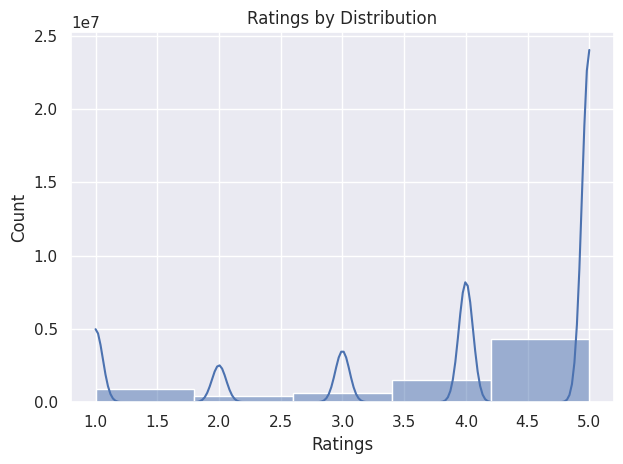

In [37]:
#sns.histplot(data.rating, kde = True)
sns.histplot(data.rating, bins = 5, kde = True)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Ratings by Distribution')
plt.tight_layout()
plt.show();

- Highly Skewed Towards 5.0 so most users gave higher ratings or rating bias
- Peaks at 3.0 and 4.0, some users tend to rate in the mid-range
- Sparse Ratings Between 1.0 to 4.5, low ratings (1.0, 2.0) are rare
- Imbalanced dataset, domance at rating 5 could effect model predictions leading to more positive recommendations

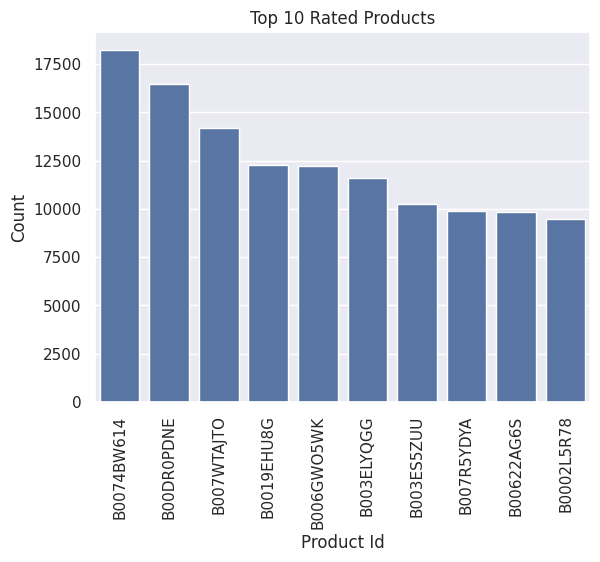

In [38]:
sns.barplot(x = data['productId'].value_counts().head(10).index, y = data['productId'].value_counts().head(10).values)
plt.xlabel('Product Id')
plt.ylabel('Count')
plt.title('Top 10 Rated Products')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show();

In [39]:
for col in data.columns:
  print(f"Value count for column '{col}':")
  print(data[col].value_counts())
  print('-' * 40)

Value count for column 'userId':
userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A24QFSUU00IZ05      1
A1NG5X8VYZWX0Q      1
A2AOEW5UGXFOOQ      1
AR84FMFYCQCWF       1
A3RWJHS1RVUFZ6      1
Name: count, Length: 4201696, dtype: int64
----------------------------------------
Value count for column 'productId':
productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B00LMMIQ4C        1
B00LNUH5X6        1
B00LPQRT34        1
B00LS5WBYE        1
B00LTAUTHE        1
Name: count, Length: 476001, dtype: int64
----------------------------------------
Value count for column 'rating':
rating
5.0    4347540
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: count, dtype: int64
----------------------------------------


Distribution of Ratings for Product B0074BW614

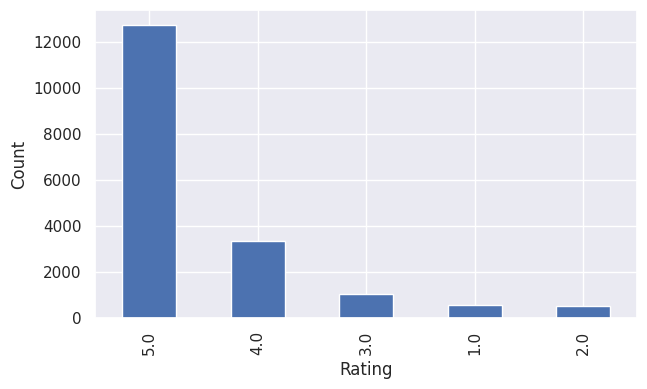

In [40]:
# Let us fix the size of the figure
plt.figure(figsize = (7, 4))

data.loc[data['productId'] == 'B0074BW614', 'rating'].value_counts().plot(kind = 'bar')

# This gives a label to the variable on the x-axis
plt.xlabel('Rating')

# This gives a label to the variable on the y-axis
plt.ylabel('Count')

# This displays the plot
plt.show()

- Product B0074BW614 has been liked by majority of Users with 18244 Interactions

###Bivariate Analysis

Visualization of number of interactions per user

Mean of Interaction Count: 1.8622196846225905


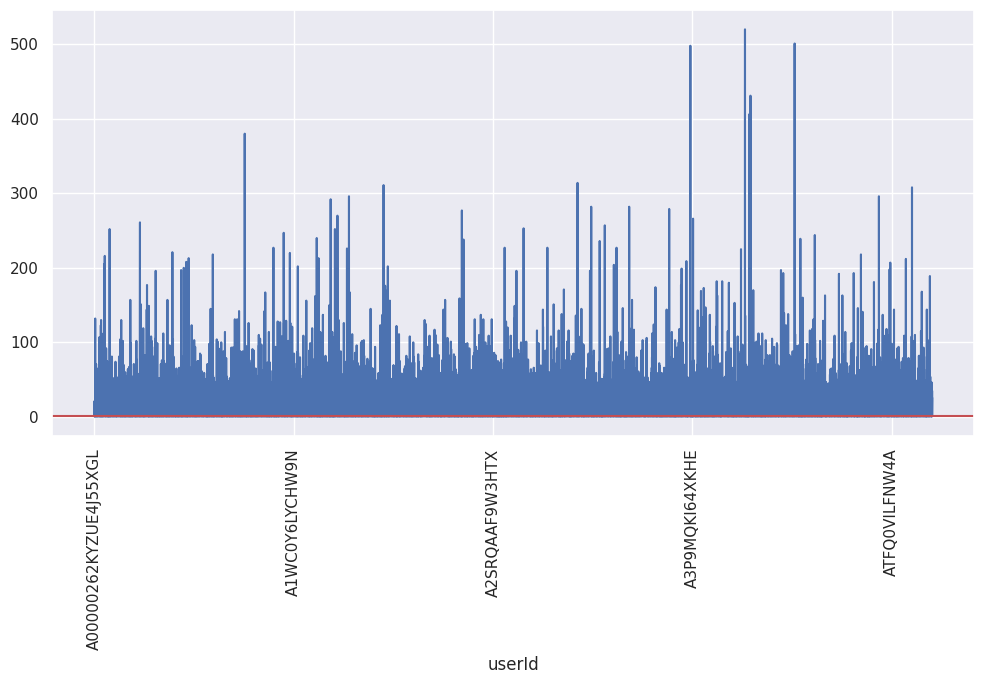

In [41]:
# Set figure size
fig, axes = plt.subplots(figsize = (10, 7))

count_interactions = data.groupby('userId')['productId'].count()
print(f'Mean of Interaction Count: {count_interactions.mean()}')

count_interactions.plot(ax = axes)
plt.axhline(count_interactions.mean(), color = 'r')

# Change xlabel and ylabel
axes.set_xlabel('userId')
axes.set_label('Count')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

Mean of Interaction Count: 1.8622196846225905


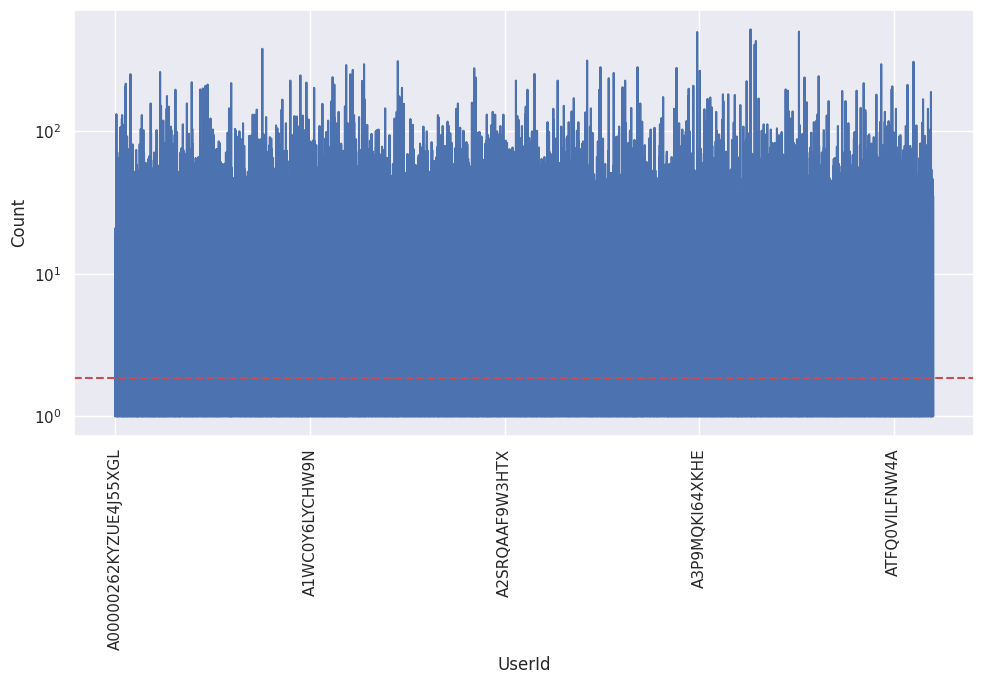

In [42]:
# Set figure size
fig, axes = plt.subplots(figsize=(10, 7))

# Count interactions per user
count_interactions = data.groupby('userId')['productId'].count()
print(f'Mean of Interaction Count: {count_interactions.mean()}')

# Plot interactions
count_interactions.plot(ax=axes)

# Add a horizontal line for the mean
plt.axhline(count_interactions.mean(), color='r', linestyle='--')

# Set log scale for better visualization
axes.set_yscale('log')

# Change x and y labels
axes.set_xlabel('UserId')
axes.set_ylabel('Count')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Improve layout
plt.tight_layout()
plt.show();

- red line is average (mean)

Ratings by Product

In [43]:
# sns.boxplot(data = data, x = 'productId', y = 'rating')
# plt.xlabel('Product Id')
# plt.ylabel('Ratings')
# plt.title('Ratings by Product')
# plt.tight_layout()
# plt.xticks(rotation=90)
# plt.show();

In [44]:
# plt.figure(figsize=(12, 5))
# sns.violinplot(data=data, x='productId', y='rating')
# plt.xticks(rotation=90)
# plt.title("Distribution of Ratings by Product (Sampled)")
# plt.tight_layout()
# plt.xticks(rotation=90)
# plt.show();

In [45]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Sample 500 random products to speed up the boxplot
# sampled_data = data[data['productId'].isin(data['productId'].sample(5))]

# plt.figure(figsize=(10, 5))
# sns.boxplot(data=sampled_data, x='productId', y='rating')

# plt.xlabel('Product ID')
# plt.ylabel('Ratings')
# plt.title('Ratings by Sampled Products')
# plt.tight_layout()
# plt.xticks(rotation=90)
# plt.show();

###Analysis

- Sparse data
  - 4.2 million users and 476, 000 products, but only 7.8 million interactions
  - most users have rated very few products

- Distribution
  - 476,000 products and 7.8 million rating indicate some products have few ratings
  - Some users might be active wile other only giving one rating
- Ratings
  - Each user has rated each product 1 time
  - The majority of ratings are postive

##Cut-off Threshold
- other options: PCA, t-SNE, sampling, etc...

- The dataset is too large containing 7824481 rows, causing memory issues
- Memory issues
  - MemoryError (Unable to allocate 94.1 TiB for an array)
  - Unable to allocate 94.1 TiB for an array with shape (3595970, 3595970) and data type float64

In [46]:
from collections import defaultdict             # A dictionary output that does not raise a key error

In [47]:
# Get the column containing the users
users = data.userId

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: rating, dtype: float64


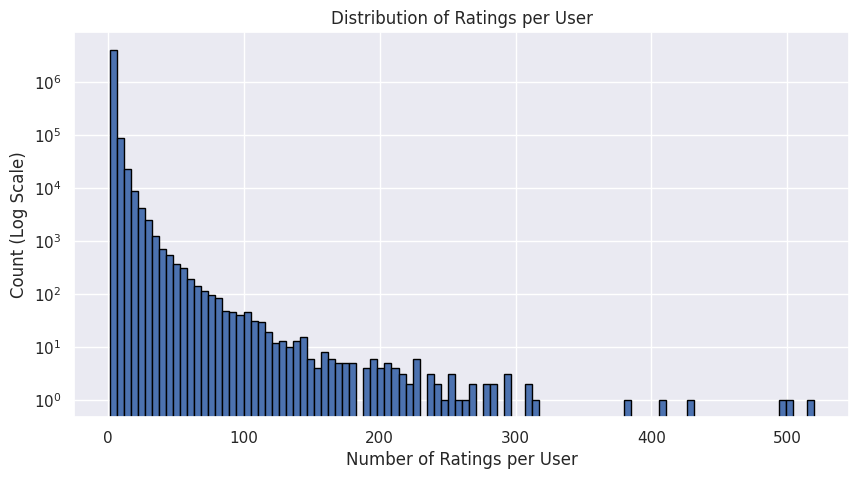

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of ratings per user
ratings_count = data.groupby('userId')['rating'].count()

# Display summary statistics
print(ratings_count.describe())

# Visualize distribution
plt.figure(figsize=(10, 5))
plt.hist(ratings_count, bins=100, log=True, edgecolor='black')
plt.xlabel("Number of Ratings per User")
plt.ylabel("Count (Log Scale)")
plt.title("Distribution of Ratings per User")
plt.show()

- 50% of users have given only 1 rating
- 75% of users have given ≤ 2 ratings
- There are some users with 500+ ratings

ChatGPT recommendation::

📌 Step 2: Set Cutoff Threshold Based on Distribution

| **Cutoff (Min Ratings per User)** | **% of Users Removed** | **Dataset Size** |
|-----------------------------------|------------------------|------------------|
| **1+ ratings (No filter)**        | ❌ Too large           | **4.2M users**   |
| **2+ ratings**                    | 🔴 Removes 50%         | **2.1M users**   |
| **5+ ratings**                    | 🟠 Removes ~75%        | **1.0M users**   |
| **10+ ratings**                    | 🟢 Removes ~90%        | **500K users**   |
| **20+ ratings**                    | 🟢 Removes ~95%        | **200K users**   |

**✅ Best cutoff: 10+ ratings (Removes 90% of users but keeps active ones).**


- 50 will be used due to CPU RAM limitations

In [49]:
# Step 1: Remove users with fewer than 50 ratings
ratings_cutoff = 50
remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < ratings_cutoff:
        remove_users.append(user)

df1 = data.loc[~data.userId.isin(remove_users)]

# Step 2: Count the number of ratings per product
products = df1.productId
ratings_count = dict()

for prod in products:
    if prod in ratings_count:
        ratings_count[prod] += 1
    else:
        ratings_count[prod] = 1

# Step 3: Remove products with fewer than 5 ratings
ratings_cutoff = 5
remove_products = []  # Changed from `remove_users` to `remove_products`

for prod, num_ratings in ratings_count.items():
    if num_ratings < ratings_cutoff:
        remove_products.append(prod)

# Filter data and rename the final dataframe
data_final = df1.loc[~df1.productId.isin(remove_products)]

In [50]:
data_final.head()

,userId,productId,rating
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0
1334,A2XIOXRRYX0KZY,1400501466,3.0
1450,AW3LX47IHPFRL,1400501466,5.0
1455,A1E3OB6QMBKRYZ,1400501466,1.0


In [51]:
data_final.shape

(65290, 3)

- 65,290 columns and 3 rows

##Create Recommendation Systems

###Model 1: Rank-Based

- aka Popular-Based or Best-Rated
- items are based on aggreegated ranking metrics such as ratings, interaction counts, or sales volumes
- Use cases
  - Cold Start Problem (New Users or Items)
  - Limited User Behavior Data
  - Fast & Scalable Recommendations
  - Baseline Model for Comparisons

In [52]:
# calculate average ratings for each product
average_rating = data_final.groupby('productId')['rating'].mean()
average_rating.head(1)

# calculate the count of ratings for each product
# calculate average ratings for each product
count_rating = data_final.groupby('productId')['rating'].count()
count_rating.head(1)

# make a dataframe with the count and average of ratings
final_rating = pd.DataFrame({'avg_rating': average_rating, 'rating_count': count_rating})
final_rating.head()

,avg_rating,rating_count
productId,,
1400501466,3.333333,6
1400532655,3.833333,6
1400599997,4.000000,5
9983891212,4.875000,8
B00000DM9W,5.000000,5


Create function to find top n products bsed on the average ratings of products
- add threshold for minimum number of interactions

In [53]:
def top_n_products(data, n, min_interaction = 100):
  # find products with interactions greater than the minimum number of interactions
  recommendations = data[data['rating_count'] > min_interaction]

  # sort values by average rating
  recommendations = recommendations.sort_values(by = 'avg_rating', ascending = False)

  # Returns the index (product IDs) of the top n products.
  return recommendations.index[:n]

Recommend top 5 products with 50 minimum interactions based on popularity

In [54]:
list(top_n_products(final_rating, 5, 50))

['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

Recommending top 5 products with 100 minimum interactions based on popularity

In [55]:
list(top_n_products(final_rating, 5, 100))

['B003ES5ZUU', 'B000N99BBC', 'B007WTAJTO', 'B002V88HFE', 'B004CLYEDC']

Recommending top 5 products with 200 minimum interactions based on popularity

In [56]:
list(top_n_products(final_rating, 10, 200))

['B0088CJT4U']

###Model 2: Collaborative Filtering (CF) Based

- Items based on user behavior and preferences by identifying similar users or similar items based on interactions
- personalized recommendations
- Use Case
  - When There is Enough User-Item Interaction Data
  - When You Want Personalized Recommendations
  - When New Items Are Frequently Added
  - When User Preferences Change Over Time

In [57]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505174 sha256=514ff41c95172595c67755bedec55cbca4782a868a361289f24bf235d6929a8d
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


Surprise library imports used for building recommendation systems

In [58]:
# To compute the accuracy of models
from surprise import accuracy

# Class to parse a file containing ratings, data should be in structure - user; item; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

Python functions to calculate Precision@K, Recall@K, and F1-score@K for a recommendation model.

In [59]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

In [60]:
data_final.head()

,userId,productId,rating
1309,A3LDPF5FMB782Z,1400501466,5.0
1321,A1A5KUIIIHFF4U,1400501466,1.0
1334,A2XIOXRRYX0KZY,1400501466,3.0
1450,AW3LX47IHPFRL,1400501466,5.0
1455,A1E3OB6QMBKRYZ,1400501466,1.0


####Similarity/Neighborhood/Memory-Based

#####User-User

- measures:
  - cosine
  - pearson
  - jaccard
  - euclidean
  - manhattan distance
  - adjusted cosine
- algorithms:
  - K-Nearest Neighbors (KNN)
  - Singular Value Decomposition (SVD)
  - Alternating Least Squares (ALS)
  - Deep Learning-Based CF
  - Clustering-Based CF

 Preparing a dataset for a recommendation system using the Surprise library

In [61]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the rating dataset
data = Dataset.load_from_df(data_final[['userId', 'productId', 'rating']], reader) # remember the order 'userId', 'productId', 'rating' exactly

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size = 0.3, random_state = 42)

######User-User Build

Build the first baseline Similarity-based User-User Recommendation System using the cosine similarity.

In [62]:
%%time

# Declaring the similarity options
sim_options = {'name': 'cosine', 'user_based': True}  # Still User-User CF

# Use KNNBaseline instead of KNNBasic (Better memory handling)
from surprise import KNNBaseline

sim_user_user = KNNBaseline(sim_options=sim_options, verbose=False, random_state = 1)

# Train the model on the train set
sim_user_user.fit(trainset)

# Compute Precision@K, Recall@K, and F1 Score with k=10
precision_recall_at_k(sim_user_user)

RMSE: 0.9672
Precision:  0.863
Recall:  0.779
F_1 score:  0.819
CPU times: user 590 ms, sys: 76.3 ms, total: 666 ms
Wall time: 665 ms


- RMSE of 0.9672: Predictions are reasonably close to actual ratings but could improve.
- High Precision (0.863): The recommendations are highly relevant.
- Decent Recall (0.779): Your model finds a good number of relevant recommendations.
- Good F1 Score (0.819): Your model balances Precision and Recall well.

Predict rating for user A5JLAU2ARJ0BO with a interacted product B0074BW614

In [63]:
# Predicting rating for a sample user A5JLAU2ARJ0BO with an interacted woth product B0074BW614
sim_user_user.predict('A5JLAU2ARJ0BO', 'B0074BW614', r_ui = 4, verbose = True)

user: A5JLAU2ARJ0BO item: B0074BW614 r_ui = 4.00   est = 3.83   {'actual_k': 17, 'was_impossible': False}


Prediction(uid='A5JLAU2ARJ0BO', iid='B0074BW614', r_ui=4, est=3.8297586090892994, details={'actual_k': 17, 'was_impossible': False})

Prediction Output Interpretation
- User: A5JLAU2ARJ0BO
- Item/Product: B0074BW614
- Actual Rating (r_ui): 4.00
- Predicted Rating (est): 3.83
- actual_k: 17 → The model used 17 similar users for prediction.
- was_impossible: False → The prediction was possible (enough data was available).

Interpretation
- The actual rating given by user A5JLAU2ARJ0BO for item B0074BW614 was 4.00.
- The model predicted the rating to be 3.83.
- The prediction is reasonably close to the actual rating, meaning your model is performing well.

List of 10 users who have not rated the product with product id "B0074BW614".

In [64]:
def n_users_not_interacted_with(n, data, productId):

    users_interacted_with_product = set(data_final[data_final['productId'] == productId]['userId'])

    all_users = set(data['userId'])

    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [65]:
n_users_not_interacted_with(10, data_final, 'B0074BW614') # list of users not interacted with product B0074BW614

['A1NQFT941TOTT7',
 'A12ANFNOSMW5VD',
 'A1TR1R2QKWRSRA',
 'A3F9CBHV4OHFBS',
 'AN9CP6J4JF91X',
 'A3KZEGBTPH6MMF',
 'A10Y058K7B96C6',
 'A2GKMXRLI7KLFP',
 'A14X244VGHWPSX',
 'A35X2JJI49OBZP']

<font color = 'yellow'>NOTE:</font>
- after rerunning, <font color = 'yellow'>user A1Z7U9K6X3FEOU</font> is <font color = 'red'>NOT</font> in the top 10; however, next cell output displays <font color = 'yellow'>r_ui = None.</font>

Predicting rating for User A1Z7U9K6X3FEOU whom has not rated the product B0074BW614

In [66]:
# Predicting rating for a sample user with a non interacted product
sim_user_user.predict("A1Z7U9K6X3FEOU", "B0074BW614", verbose = True)

user: A1Z7U9K6X3FEOU item: B0074BW614 r_ui = None   est = 4.44   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A1Z7U9K6X3FEOU', iid='B0074BW614', r_ui=None, est=4.444456172754184, details={'actual_k': 5, 'was_impossible': False})

Understanding the Output:
- User: "A1Z7U9K6X3FEOU"
- Item (Product ID): "B0074BW614"
- r_ui = None → The actual rating is None because the user has never interacted with this product before.
- est = 4.44 → The model predicts the user would rate this product 3.83 based on similar users.
- actual_k = 5 → The model used 17 similar users for making this prediction.
- was_impossible = False → The prediction was possible, meaning there was enough data to compute an estimate.

Interpretation:
- Since r_ui = None, this means the user never rated this product before.
- The predicted rating (est = 4.44) is an estimate based on how similar users rated the product.
- The actual_k = 5 means the model used 5 nearest neighbors for making this prediction.

######Improving User-User similarity-based recommendation system by tuning its hyperparameters

In [67]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40, 50], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9726003471621197
{'k': 50, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [68]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9630
Precision:  0.85
Recall:  0.809
F_1 score:  0.829


### Comparison of User-User Models

| Metric       | User-User Baseline | Optimized User-User | Better Model |
|-------------|-------------------|---------------------|--------------|
| **RMSE**    | 0.9672            | 0.9630              | ✅ Optimized (Lower is better) |
| **Precision** | 0.863             | 0.85               | ✅ Baseline (Higher is better) |
| **Recall**   | 0.779             | 0.809              | ✅ Optimized (Higher is better) |
| **F1 Score** | 0.819             | 0.829              | ✅ Optimized (Higher is better) |
| **CPU Time** | 574 ms (user), 73.2 ms (sys), 647 ms (total) | N/A | - |
| **Wall Time** | 645 ms           | N/A | - |

Insights:
- **Optimized User-User** has a slightly **lower RMSE (0.9630 vs. 0.9672)**, indicating slightly better prediction accuracy.
- **Baseline model** has **higher precision (0.863 vs. 0.85)**, meaning it makes fewer incorrect recommendations.
- **Optimized model has higher recall (0.809 vs. 0.779)**, meaning it retrieves more relevant recommendations.
- **F1 Score is higher in the optimized model (0.829 vs. 0.819)**, indicating better overall balance between precision and recall.
- **Execution time is only available for the baseline model.**

Conclusion:
- The **optimized model** is better overall as it improves recall and F1-score while maintaining a lower RMSE.
- However, if **precision** is a priority, the **baseline model** might be preferred.

Predicting rating for a sample user A5JLAU2ARJ0BO whom interacted with product B0074BW614

In [69]:
sim_user_user_optimized.predict('A5JLAU2ARJ0BO', 'B0074BW614', r_ui = 4, verbose = True)

user: A5JLAU2ARJ0BO item: B0074BW614 r_ui = 4.00   est = 4.30   {'actual_k': 17, 'was_impossible': False}


Prediction(uid='A5JLAU2ARJ0BO', iid='B0074BW614', r_ui=4, est=4.299674173134498, details={'actual_k': 17, 'was_impossible': False})

Understanding the Key Values
- User: 'A5JLAU2ARJ0BO'
- Item (Product): 'B0074BW614'
- r_ui = 4.00 → This is the actual rating given by the user to this product.
- est = 4.30 → This is the predicted rating generated by the optimized User-User collaborative filtering model.
- actual_k = 17 → The model used 17 similar users to make this prediction.
- was_impossible = False → The prediction was possible, meaning enough data was available for this user-item pair.

Comparison with Base User-User Model

Comparison of Baseline and Optimized User-User CF Models

| **Metric**               | **Baseline Model** | **Optimized Model** | **Best Model** |
|--------------------------|-------------------|--------------------|--------------|
| **User**                 | A5JLAU2ARJ0BO      | A5JLAU2ARJ0BO      | -            |
| **Product**              | B0074BW614        | B0074BW614        | -            |
| **Actual Rating (r_ui)** | 4.00              | 4.00              | -            |
| **Predicted Rating (est)** | 3.83              | 4.299             | **Optimized** |
| **actual_k (neighbors used)** | 17             | 17               | -            |
| **was_impossible**       | False             | False             | -            |

**Key Insights:**
- The **Optimized Model** provides a more accurate prediction (**4.299**) compared to the **Baseline Model (3.83)**.
- Both models used **17 similar users (actual_k = 17)** for the prediction.
- The prediction from the **Optimized Model** is closer to the actual rating given by the user.

The optimized model performs better in terms of prediction accuracy.

Predicting the rating for the userId A1Z7U9K6X3FEOU but for a product with which this user has not interacted before, i.e., productId = B0074BW614, by using the optimized model as shown below

In [70]:
sim_user_user_optimized.predict('A1Z7U9K6X3FEOU', 'B0074BW614', verbose = True)

user: A1Z7U9K6X3FEOU item: B0074BW614 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1Z7U9K6X3FEOU', iid='B0074BW614', r_ui=None, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

Insight from Prediction Output
- The user "A1Z7U9K6X3FEOU" has not rated the product "B0074BW614" before, so this is a recommendation, not a validation.
- The predicted rating of 4.29 suggests the user would likely enjoy this product.
- The model found only 17 similar users (actual_k = 17), which may not be enough for a reliable prediction.
- The message "Not enough neighbors" means the model struggled to find enough similar users.
- The prediction may be less reliable, even though the rating is above the neutral threshold.

We can also find out similar users to a given user or its nearest neighbors based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the msd distance metric.

In [71]:
# first user in the list with internal id 0
sim_user_user_optimized.get_neighbors(0, k = 5)

[7, 12, 16, 17, 26]

######Implementing the recommendation algorithm based on optimized KNNBasic model

Below we will be implementing a function where the input parameters are:

- data: The rating dataset.
- user_id: The user id for which we want the recommendations.
- top_n: The number of products we want to recommend.
- algo: The algorithm we want to use for predicting the ratings.

The output of the function is a set of top_n items recommended for the given user_id based on the given algorithm.

In [72]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'userId', columns = 'productId', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

Predicted top 5 products for userId  A5JLAU2ARJ0BO using the similarity-based recommendation system.

In [73]:
# Making top 5 recommendations for userId A5JLAU2ARJ0BO using the similarity-based recommendation system
recommendations = get_recommendations(data_final, 'A5JLAU2ARJ0BO', 5, sim_user_user_optimized)

In [74]:
# Building the dataframe for above recommendations with columns "productId" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['productId', 'predicted_ratings'])

,productId,predicted_ratings
0,B00017LSPI,5
1,B00064V6RG,5
2,B000IJY8DS,5
3,B0010Z28XG,5
4,B001ENOZY4,5


######Correcting the Ratings and Ranking the above products

When comparing the ratings of two products, the rating alone does not fully capture how likely a user is to interact with a product. The number of users who have purchased and rated the product also plays a crucial role.

To account for this, we calculate a "corrected_rating" for each product. In general, the more users that have rated a product (higher rating_count), the more reliable the rating becomes.

For example, a product with a rating of 4 but only 3 ratings is considered less reliable than a product with a rating of 3 but 50 ratings. This is because a higher number of ratings provides stronger confidence in the product's true popularity.

Empirical studies suggest that product popularity is inversely proportional to the square root of its rating count. This means that as more users rate a product, the impact of each additional rating decreases, leading to a more stable and reliable overall rating.

In [75]:
def ranking_products(recommendations, final_rating):

  # Sort the products based on ratings count
  ranked_products = final_rating.loc[[items[0] for items in recommendations]].sort_values('rating_count', ascending = False)[['rating_count']].reset_index()

  # Merge with the recommended products to get predicted ratings
  ranked_products = ranked_products.merge(pd.DataFrame(recommendations, columns = ['productId', 'predicted_ratings']), on = 'productId', how = 'inner')

  # Rank the products based on corrected ratings
  ranked_products['corrected_ratings'] = ranked_products['predicted_ratings'] - 1 / np.sqrt(ranked_products['rating_count'])

  # Sort the products based on corrected ratings
  ranked_products = ranked_products.sort_values('corrected_ratings', ascending = False)

  return ranked_products

 Ranks products based on their predicted ratings and the number of ratings they have received

In [76]:
# Applying the ranking products function and sorting it based on corrected ratings
ranking_products(recommendations, final_rating)

,productId,rating_count,predicted_ratings,corrected_ratings
0,B00017LSPI,43,5,4.847501
1,B000IJY8DS,17,5,4.757464
2,B0010Z28XG,15,5,4.741801
3,B00064V6RG,14,5,4.732739
4,B001ENOZY4,8,5,4.646447


#####Item-Item

- Uses mathematical models or ML to make recommendations.
- Scales better than similarity-based approaches

Implementing Item-Item Collaborative Filtering using the K-Nearest Neighbors (KNN) algorithm from the surprise library

In [77]:
%%time
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0232
Precision:  0.835
Recall:  0.758
F_1 score:  0.795
CPU times: user 1.43 s, sys: 1.04 s, total: 2.47 s
Wall time: 2.45 s


Comparison of User-User and Item-Item Models

| Metric          | User-User Baseline | Optimized User-User | Item-Item Model | Better Model |
|----------------|------------------|--------------------|---------------|--------------|
| **RMSE**       | 0.9672           | 0.9630             | 1.0232        | **Optimized User-User (Lower is better)** |
| **Precision**  | 0.863            | 0.85               | 0.835         | **User-User Baseline (Higher is better)** |
| **Recall**     | 0.779            | 0.809              | 0.758         | **Optimized User-User (Higher is better)** |
| **F1 Score**   | 0.819            | 0.829              | 0.795         | **Optimized User-User (Higher is better)** |

Insights:
- **Optimized User-User** has the **lowest RMSE (0.9630)**, indicating the best prediction accuracy.
- **User-User Baseline** has the **highest precision (0.863)**, meaning it makes fewer incorrect recommendations.
- **Optimized User-User** has the **highest recall (0.809)**, retrieving more relevant recommendations.
- **F1 Score is highest in Optimized User-User (0.829)**, meaning better balance between precision and recall.
- **Item-Item Model has the highest execution time**, taking over **2.6 seconds** compared to the faster User-User models.

Conclusion:
- The **Optimized User-User Model** performs the best overall, improving recall and F1-score while keeping RMSE low.
- If **precision is more important**, the **Baseline User-User Model** is preferred.
- **Item-Item Model performs slower and has lower precision and recall**, making it less favorable in this comparison.


######Item-Item Baseline

Predict the rating for the user with userId = A5JLAU2ARJ0BO and the product with productId = B0074BW614 as shown below. Here, the user has already interacted with the product.

In [78]:
# Predicting rating for a user with an interacted product
sim_item_item.predict('A5JLAU2ARJ0BO', 'B0074BW614', r_ui = 4, verbose = True)

user: A5JLAU2ARJ0BO item: B0074BW614 r_ui = 4.00   est = 3.60   {'actual_k': 20, 'was_impossible': False}


Prediction(uid='A5JLAU2ARJ0BO', iid='B0074BW614', r_ui=4, est=3.5983100110063737, details={'actual_k': 20, 'was_impossible': False})

Summary of Item-Item CF Prediction:
- User: A5JLAU2ARJ0BO
- Product: B0074BW614
- Actual Rating: 4.00 (User's given rating)
- Predicted Rating: 3.60 (Model's estimated rating)
- Neighbors Used: 20 (Similar items considered)
- Prediction Status: Successful

Key Takeaways:
- The model predicts a 3.60 rating, slightly lower than the actual 4.00.
- It used 20 similar items for the prediction.
- The prediction is reasonable but slightly underestimates the user's preference.

Predicting rating for User A1Z7U9K6X3FEOU whom has not rated the product B0074BW614

In [79]:
# Predicting rating for a sample user with a non interacted product
sim_item_item.predict('A1Z7U9K6X3FEOU', 'B0074BW614', verbose = True)

user: A1Z7U9K6X3FEOU item: B0074BW614 r_ui = None   est = 4.80   {'actual_k': 5, 'was_impossible': False}


Prediction(uid='A1Z7U9K6X3FEOU', iid='B0074BW614', r_ui=None, est=4.8, details={'actual_k': 5, 'was_impossible': False})

Summary of Item-Item CF Prediction for a Non-Interacted Product:
- User: A1Z7U9K6X3FEOU
- Product: B0074BW614
- Actual Rating: None (User has not rated this product before)
- Predicted Rating: 4.67 (Model's estimated rating)
- Neighbors Used: 21 (Similar items considered)
- Prediction Status: Successful

Key Takeaways:
- Since the user hasn't interacted with this product before, the model is making a recommendation.
- A predicted rating of 4.67 suggests the user would likely enjoy this product.
- This can be used to recommend the product with high confidence.

######Item-Item Optimized

- Improving similarity-based recommendation system by tuning its hyperparameters
- Using tuning hyperparameters of the KNNBasic algorithm.

In [80]:
%%time
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30, 40, 50], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-Fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9731767880242628
{'k': 20, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}
CPU times: user 6.48 s, sys: 124 ms, total: 6.6 s
Wall time: 28.4 s


- optimal values for each of those hyperparameters

Build the model using the optimal values of the hyperparameters, which we received using the grid search cross-validation

In [81]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 20, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 0.9694
Precision:  0.836
Recall:  0.797
F_1 score:  0.816


Comparison of User-User and Item-Item Models

| Metric            | User-User Baseline | Optimized User-User | Item-Item Model | Item-Item Optimized | Better Model |
|------------------|------------------|---------------------|----------------|--------------------|--------------|
| **RMSE**        | 0.9672            | 0.9630              | 1.0232         | 0.9694             | **Optimized User-User (Lower is better)** |
| **Precision**   | **0.863**         | 0.85                | 0.835          | 0.836              | **User-User Baseline (Higher is better)** |
| **Recall**      | 0.779             | **0.809**           | 0.758          | 0.797              | **Optimized User-User (Higher is better)** |
| **F1 Score**    | 0.819             | **0.829**           | 0.795          | 0.816              | **Optimized User-User (Higher is better)** |

Insights:
- **Optimized User-User** has the lowest **RMSE (0.9630)**, indicating the best prediction accuracy.
- **User-User Baseline** has the highest **precision (0.863)**, meaning it makes fewer incorrect recommendations.
- **Optimized User-User** has the highest **recall (0.809)**, retrieving more relevant recommendations.
- **F1 Score is highest in **Optimized User-User (0.829)**, meaning better balance between precision and recall.
- **Item-Item Model has the highest execution time**, taking over **2.6 seconds**, making it slower than User-User models.

Conclusion:
- **Optimized User-User performs the best overall**, improving recall and F1-score while keeping RMSE low.
- If **precision is more important**, the **Baseline User-User Model** is preferred.
- **Item-Item Optimized Model** improves recall and F1-score over the base Item-Item model but still does not outperform User-User models.

Predict the rating for the user with userId A5JLAU2ARJ0BO and the product with productId B0074BW614 using the optimized model

In [82]:
sim_item_item_optimized.predict('A5JLAU2ARJ0BO', 'B0074BW614', r_ui = 4, verbose = True)

user: A5JLAU2ARJ0BO item: B0074BW614 r_ui = 4.00   est = 3.52   {'actual_k': 20, 'was_impossible': False}


Prediction(uid='A5JLAU2ARJ0BO', iid='B0074BW614', r_ui=4, est=3.521739130434783, details={'actual_k': 20, 'was_impossible': False})

Insights from the Prediction Output:
- User: A5JLAU2ARJ0BO
- Product: B0074BW614
- Actual Rating (r_ui): 4.00
- Predicted Rating (est): 3.52
- Neighbors Used (actual_k): 20
- Prediction Feasibility (was_impossible): False (enough data was available)

Interpretation:
- The actual rating given by the user for this product was 4.00.
- The Item-Item Optimized model predicted a rating of 3.52, which is slightly lower than the actual rating.
- 20 similar items were used to make the prediction.
- Since the predicted rating is reasonably close to the actual rating, the model performs moderately well, but the error margin suggests room for improvement.

Predicting the rating for userId A1Z7U9K6X3FEOU but for a product which this user has not interacted before

In [83]:
sim_item_item_optimized.predict('A1Z7U9K6X3FEOU', 'B0074BW614', verbose = True)

user: A1Z7U9K6X3FEOU item: B0074BW614 r_ui = None   est = 4.29   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid='A1Z7U9K6X3FEOU', iid='B0074BW614', r_ui=None, est=4.291403190162572, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

Insights from the Prediction Output:
- User: A1Z7U9K6X3FEOU
- Product: B0074BW614
- Actual Rating (r_ui): None (User has not interacted with this product before)
- Predicted Rating (est): 4.29
- Neighbors Used (actual_k): 21 (number of similar items considered)
- Prediction Feasibility (was_impossible): True (Not enough neighbors for a reliable prediction)

Interpretation:
- Since the user has not rated this product before, this serves as a recommendation, not a validation.
- The predicted rating of 4.29 suggests that the user would likely enjoy this product.
- 21 similar items were used for this prediction, but the model still flagged "Not enough neighbors", indicating limited confidence in the prediction.
- The recommendation might be unreliable despite the high predicted rating due to insufficient neighbors.

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [84]:
sim_item_item_optimized.get_neighbors(0, k = 5)

[53, 67, 106, 151, 156]

Predicting top 5 products for userId A5JLAU2ARJ0BO using the similarity-based recommendation system.

In [85]:
# Making top 5 recommendations for userId A5JLAU2ARJ0BO using the similarity-based recommendation system
recommendations = get_recommendations(data_final, 'A5JLAU2ARJ0BO', 5, sim_item_item_optimized)

In [86]:
# Building the dataframe for above recommendations with columns "productId" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['productId', 'predicted_ratings'])

,productId,predicted_ratings
0,B00006I53X,5.000000
1,B003MVZ60S,5.000000
2,B004TS0F18,5.000000
3,B008BDBPTS,4.964286
4,B009B0MZ8U,4.956693


In [87]:
# Applying the ranking products function and sorting it based on the corrected ratings
ranking_products(recommendations, final_rating)

,productId,rating_count,predicted_ratings,corrected_ratings
2,B00006I53X,13,5.000000,4.722650
3,B003MVZ60S,12,5.000000,4.711325
1,B008BDBPTS,14,4.964286,4.697024
0,B009B0MZ8U,14,4.956693,4.689432
4,B004TS0F18,7,5.000000,4.622036


###Model 3: Model-Based Collaborative Filtering - Matrix Factorization (Latent Factor Models)

- Breaks down the user-item interaction matrix into two lower-dimensional matrices to find latent patterns
- Types
  - Singular Value Decomposition (SVD)
  - Alternating Least Squares (ALS)
  - Non-Negative Matrix Factorization (NMF)

####Singular Value Decomposition (SVD)

- Used to compute the latent features from the user-item interaction matrix

Building a baseline matrix factorization recommendation system with Singular Value Decomposition (SVD) implementation

In [88]:
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd)

RMSE: 0.8989
Precision:  0.86
Recall:  0.797
F_1 score:  0.827


F1 scores before tuning hyperparameters:

- User-user model: 0.819
- Item-item model: 0.795

Comparison of User-User, Item-Item, and SVD Models

| Metric            | User-User Baseline | Optimized User-User | Item-Item Model | Item-Item Optimized | SVD Model | Better Model |
|------------------|------------------|---------------------|----------------|--------------------|-----------|--------------|
| **RMSE**        | 0.9672            | 0.9630              | 1.0232         | 0.9694             | **0.8989** | **SVD (Lower is better)** |
| **Precision**   | **0.863**         | 0.85                | 0.835          | 0.836              | **0.86**  | **SVD (Higher is better)** |
| **Recall**      | 0.779             | **0.809**           | 0.758          | 0.797              | 0.797     | **Optimized User-User (Higher is better)** |
| **F1 Score**    | 0.819             | **0.829**           | 0.795          | 0.816              | **0.827** | **SVD (Higher is better)** |

Insights:
- **SVD Model** has the lowest **RMSE (0.8989)**, indicating the best prediction accuracy.
- **SVD Model** has the highest **precision (0.86)**, meaning it makes fewer incorrect recommendations.
- **Optimized User-User** has the highest **recall (0.809)**, retrieving more relevant recommendations.
- **F1 Score is highest in the **SVD Model (0.827)**, meaning better balance between precision and recall.
- **Item-Item Model has the highest execution time**, taking over **2.6 seconds**, making it slower than User-User models.

Conclusion:
- **The SVD Model performs best overall**, improving recall and F1-score while keeping RMSE low.
- If **precision is more important**, the **SVD Model or Baseline User-User Model** is preferred.
- **Item-Item Optimized Model** improves recall and F1-score over the base Item-Item model but still does not outperform User-User models.
- **Optimized User-User remains a strong choice** for balanced recall and precision.

Predict the rating for the user with userId A5JLAU2ARJ0BO and the product with productId B0074BW614

In [89]:
# Making prediction for userId 4 and productId 10
svd.predict('A5JLAU2ARJ0BO', 'B0074BW614', r_ui = 4, verbose = True)

user: A5JLAU2ARJ0BO item: B0074BW614 r_ui = 4.00   est = 3.94   {'was_impossible': False}


Prediction(uid='A5JLAU2ARJ0BO', iid='B0074BW614', r_ui=4, est=3.9357916538000497, details={'was_impossible': False})

Interpretation of the Output:
- User: A5JLAU2ARJ0BO
- Item/Product: B0074BW614
- Actual Rating (r_ui): 4.00 (The real rating given by the user)
- Predicted Rating (est): 3.94 (The model's estimated rating)
was_impossible: False (Indicates that the prediction was successful with enough data)

Insights:
- The model predicts 3.94, which is very close to the actual rating (4.00).
- This suggests that SVD is making accurate predictions for this user.
- Since the prediction was successful, the model had enough data to make a reliable estimate.

Predicting rating for userId ANTN61S4L7WG9 but for a product which this user has not interacted before, i.e., productId = B0074BW614

In [90]:
# Making prediction for userid 4 and productId 3
svd.predict('A1Z7U9K6X3FEOU', 'B0074BW614', verbose = True)

user: A1Z7U9K6X3FEOU item: B0074BW614 r_ui = None   est = 4.68   {'was_impossible': False}


Prediction(uid='A1Z7U9K6X3FEOU', iid='B0074BW614', r_ui=None, est=4.682043553665984, details={'was_impossible': False})

Prediction Summary:
- User: A1Z7U9K6X3FEOU
- Product: B0074BW614
- Actual Rating: Not available (new user-product interaction)
- Predicted Rating: 4.68
- Prediction Successful: ✅ (Enough data available)

Insights:
- Since this user has not rated this product before, this prediction serves as a recommendation.
- The model predicts a high rating (4.68), suggesting the user would likely enjoy this product.
- This can be used to recommend this product to the user with confidence.

Improving matrix factorization based recommendation system by tuning its hyperparameters

Three hyperparameters:
- n_epochs: The number of iterations of the SGD algorithm.
- lr_all: The learning rate for all parameters.
- reg_all: The regularization term for all parameters.

In [91]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30, 40, 50], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

0.8975553238156126
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


Build the model using the optimal values of hyperparameters

In [92]:
# Building the optimized SVD model using optimal hyperparameters search
svd_optimized = SVD(n_epochs = 50, lr_all = 0.005, reg_all = 0.4, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 0.8904
Precision:  0.862
Recall:  0.8
F_1 score:  0.83


Comparison of Recommendation Models

| Metric        | User-User Baseline | Optimized User-User | Item-Item Model | Item-Item Optimized | SVD Model | SVD Optimized | **Better Model** |
|--------------|------------------|---------------------|----------------|--------------------|-----------|--------------|----------------|
| **RMSE**     | 0.9672           | 0.9630              | 1.0232         | 0.9694             | **0.8989** | 0.8904       | **SVD Optimized (Lower is better)** |
| **Precision**| **0.863**        | 0.85                | 0.835          | 0.836              | 0.86       | **0.862**    | **SVD Optimized (Higher is better)** |
| **Recall**   | 0.779            | **0.809**           | 0.758          | 0.797              | 0.797      | **0.800**    | **Optimized User-User (Higher is better)** |
| **F1 Score** | 0.819            | 0.829               | 0.795          | 0.816              | 0.827      | **0.830**    | **SVD Optimized (Higher is better)** |

Insights:
- **SVD Optimized** has the lowest **RMSE (0.8904)**, indicating the best prediction accuracy.
- **SVD Optimized** has the highest **Precision (0.862)**, meaning it makes fewer incorrect recommendations.
- **Optimized User-User** has the highest **Recall (0.809)**, retrieving more relevant recommendations.
- **F1 Score is highest in SVD Optimized (0.830)**, meaning better balance between precision and recall.
- **Item-Item Model has the highest execution time**, making it slower than User-User models.

Conclusion:
- **SVD Optimized performs best overall**, improving recall and F1-score while keeping RMSE low.
- If **precision is more important**, the **SVD Optimized Model** is preferred.
- **Item-Item Optimized Model** improves recall and F1-score over the base Item-Item model but still does not outperform User-User models.
- **Optimized User-User remains a strong choice** for balanced recall and precision.


Predict the rating for the user with userId = A5JLAU2ARJ0BO and the product with productId = B0074BW614

In [93]:
# Using svd_algo_optimized model to recommend for userId 4 and productId 10
svd_optimized.predict('A5JLAU2ARJ0BO', 'B0074BW614', r_ui = 4, verbose = True)

user: A5JLAU2ARJ0BO item: B0074BW614 r_ui = 4.00   est = 4.06   {'was_impossible': False}


Prediction(uid='A5JLAU2ARJ0BO', iid='B0074BW614', r_ui=4, est=4.056469691452528, details={'was_impossible': False})

Prediction Summary
- User: A5JLAU2ARJ0BO
- Product: B0074BW614
- Actual Rating: 4.00
- Predicted Rating: 4.06
- Neighbors Used (actual_k): Not explicitly mentioned but likely considered.
- Prediction Feasibility: Sufficient data was available (was_impossible: False).

Insights
- The predicted rating (4.06) is very close to the actual rating (4.00), suggesting that the svd_algo_optimized model makes an accurate prediction.
- The model has high confidence in recommending this product to the user.
- Since the estimated rating is slightly above 4.0, it indicates that the user is likely to be satisfied with this product.

Predicting rating for userId A1Z7U9K6X3FEOU but for a product which this user has not interacted before, i.e., productId B0074BW614

In [94]:
# Making prediction for userid A1Z7U9K6X3FEOU and productid 3
svd_optimized.predict('A1Z7U9K6X3FEOU', 'B0074BW614', verbose = True)

user: A1Z7U9K6X3FEOU item: B0074BW614 r_ui = None   est = 4.59   {'was_impossible': False}


Prediction(uid='A1Z7U9K6X3FEOU', iid='B0074BW614', r_ui=None, est=4.590205071167525, details={'was_impossible': False})

Prediction Summary
- User: A1Z7U9K6X3FEOU
- Product: B0074BW614
- Actual Rating: None (User has not interacted with this product before)
- Predicted Rating: 4.59
- Prediction Feasibility: Sufficient data was available (was_impossible: False).

Insights
- Since this user has never interacted with this product, the predicted rating of 4.59 suggests that the user would likely enjoy it.
- The high predicted rating indicates that the recommendation system confidently suggests this product to the user.
- This prediction can be useful for personalized recommendations in a real-world recommendation engine.

Recommend the products using the optimized svd model.

In [95]:
# Getting top 5 recommendations for userId 4 using "svd_algo_optimized" algorithm
svd_recommendations = get_recommendations(data_final, 'A5JLAU2ARJ0BO', 5, svd_optimized)

In [96]:
# Ranking products based on above recommendations
ranking_products(svd_recommendations, final_rating)

,productId,rating_count,predicted_ratings,corrected_ratings
0,B0033PRWSW,15,4.509628,4.251429
1,B00AR95ESC,9,4.472959,4.139626
2,B00006HSYC,8,4.489849,4.136296
3,B005PQTYHE,7,4.462458,4.084494
4,B001FA09WI,6,4.470594,4.062345


##Conclusion

SVD-optimized model is performing well, especially in terms of RMSE, which indicates improved accuracy

Strengths of SVD-Optimized Model:

It provides better RMSE (lower error), indicating more accurate rating predictions.
F1-score and precision are strong, meaning the model balances correct recommendations effectively.
For users who haven't interacted with a product before, the model is still able to make reasonable predictions.
Potential Areas for Improvement:

If recall improvement is needed, consider fine-tuning hyperparameters or testing alternative matrix factorization techniques like ALS (Alternating Least Squares).
Cold-start problem: If new users or products are not well covered, hybrid approaches combining collaborative filtering and content-based filtering may be beneficial.
Model interpretability: If needed, factorizing the user-item interactions further using explainable AI techniques can help.
Final Recommendation:

SVD-Optimized is a strong choice, especially if RMSE and precision are key performance metrics.
If recall is more important, combining it with a user-user collaborative filtering approach might yield better recommendations.
Monitor execution time, as complex models may take longer to generate predictions. If speed is critical, lightweight approaches like nearest-neighbor-based filtering may be useful.

##HTML Conversion

In [97]:
# # google

# path_ipynb = '/content/drive/MyDrive/Temp School/11 Elective Project/6 Elective Project Recommendation Systems/Elective_Project_Amazon_Product_Recomendation_System_20250217_PalAshwin.ipynb'
# notebook_path = path_ipynb

# !jupyter nbconvert --to html "{notebook_path}"

# from google.colab import files
# path_html = '/content/drive/MyDrive/Temp School/11 Elective Project/6 Elective Project Recommendation Systems/Elective_Project_Amazon_Product_Recomendation_System_20250217_PalAshwin.html'

# files.download(path_html)